<a href="https://colab.research.google.com/github/K-Saritha/ML-LAB/blob/main/week_7_ml_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/Decision_tree_data - Decision_tree_data.csv")

In [ ]:
def entropy(data):
    y_c = (data == 'Yes').sum()
    n_c = (data == 'No').sum()
    if y_c == 0 or n_c == 0:
        return 0
    p_y = y_c / (y_c + n_c)
    p_n = n_c / (y_c + n_c)
    return -(p_y * np.log2(p_y) if p_y > 0 else 0) - (p_n * np.log2(p_n) if p_n > 0 else 0)

In [ ]:
def gain(data, feature):
    entropy_parent = entropy(data['Buys_Computer'])
    values = data[feature].unique()
    weighted_entropy_children = 0
    for value in values:
        subset = data[data[feature] == value]
        entropy_child = entropy(subset['Buys_Computer'])
        weighted_entropy_children += len(subset) / len(data) * entropy_child
    return entropy_parent - weighted_entropy_children


gain_dict = {feature: gain(data, feature) for feature in data.columns[:-1]}
highest_gain_feature = max(gain_dict, key=gain_dict.get)
print(f"Information gain for each feature:")
for feature, gain_value in gain_dict.items():
    print(f"{feature}: {gain_value}")
print(f"\nThe feature with the highest information gain is: {highest_gain_feature}")

Information gain for each feature:
Age: 0.24674981977443933
Income: 0.02922256565895487
Student: 0.15183550136234159
Credit_Rating: 0.04812703040826949

The feature with the highest information gain is: Age


In [ ]:

# Recursive function to plot the decision tree
def plot_tree(data, feature, depth=0, max_depth=3, pos=(0.5, 1), parent=None):
    if depth > max_depth or len(data['Buys_Computer'].unique()) == 1:
        leaf_label = f"Leaf: {data['Buys_Computer'].mode()[0]}"
        plt.text(pos[0], pos[1], leaf_label, ha="center", va="center", fontsize=10,
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgray"))
        if parent:
            plt.plot([parent[0], pos[0]], [parent[1], pos[1]], 'k-')
        return

    # Plot the node with the feature
    plt.text(pos[0], pos[1], f"{feature}", ha="center", va="center", fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightgreen"))

    if parent:
        plt.plot([parent[0], pos[0]], [parent[1], pos[1]], 'k-')

    unique_values = data[feature].unique()
    num_values = len(unique_values)

    # Set offset for child nodes based on the number of unique values
    x_offset = 0.5 / (depth + 1)
    for i, value in enumerate(unique_values):
        subset = data[data[feature] == value]

        # Check if the subset has only one remaining feature to choose from
        remaining_features = list(set(subset.columns[:-1]) - {feature})
        next_feature = max({k: gain(subset, k) for k in remaining_features}.items(), key=lambda item: item[1])[0] if remaining_features else None

        # Calculate position for the next child node
        child_pos = (pos[0] - x_offset + (i + 0.5) * (x_offset * 2) / num_values, pos[1] - 0.2)

        # Recursive call for the next level of the tree
        plot_tree(subset, next_feature, depth + 1, max_depth, pos=child_pos, parent=pos)

        # Plot the branch label
        plt.text((pos[0] + child_pos[0]) / 2, (pos[1] + child_pos[1]) / 2 + 0.02, f"{value}",
                 ha="center", va="center", fontsize=10, color='blue')

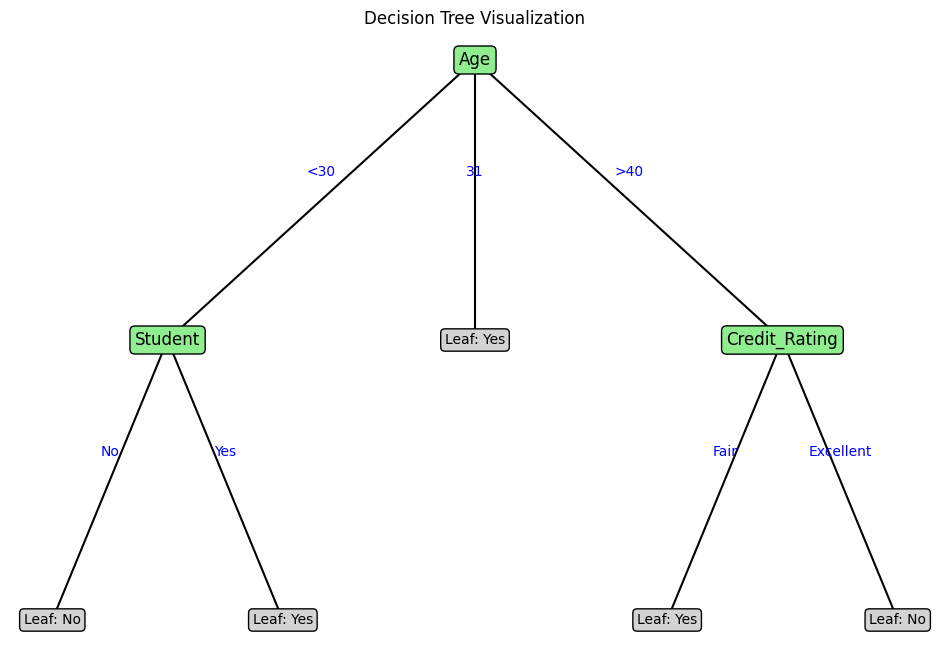

In [ ]:

# Create figure for visualization
plt.figure(figsize=(12, 8))
plt.title("Decision Tree Visualization")

# Plot the tree starting from the root
plot_tree(data, highest_gain_feature, max_depth=3)
plt.axis('off')
plt.show()